**Setup**

In [ ]:
import time
import birdnet
import soundfile as sf
import sounddevice as sd
import numpy as np
import cProfile

m=birdnet.load('geo','2.4','tf')
print('loaded', type(m))

In [ ]:
#Consts
SAMPLE_RATE = 44100
CHANNELS = 1
sd.default.samplerate = SAMPLE_RATE
sd.default.channels = 2

In [ ]:
# Predict directory
predictions = m.predict("data/")
print(predictions)

In [ ]:
# Predict directory
predictions = m.predict(-33.6903, 150.5296)
predictions.to_csv('out/predictionsLong.csv')
print(predictions)

In [ ]:
# Record
duration = 5  # seconds
myrecording = sd.rec(int(duration * SAMPLE_RATE))
sd.wait()
# Write out to wav
pr = cProfile.Profile()
pr.enable()
sf.write("out/attempt.wav", myrecording, SAMPLE_RATE)
pr.disable()
pr.print_stats(sort="cumulative")

In [ ]:
# Streaming and playback
def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata  # pass-through (monitoring)

with sd.Stream(
        dtype='float32',
        callback=callback,
):
    sd.sleep(5000)

Record to predict pipeline

In [ ]:
# Record
duration = 10  # seconds
myrecording = sd.rec(int(duration * SAMPLE_RATE))
sd.wait()
# Write out to wav
# pr = cProfile.Profile()
# pr.enable()
sf.write("out/attempt.wav", myrecording, SAMPLE_RATE)
# pr.disable()
# pr.print_stats(sort="cumulative")
predictions = m.predict("out/attempt.wav")
predictions.to_csv("out/predictions.csv")


In [ ]:
# bird_analyzer.py
import subprocess
import sounddevice as sd
from scipy.io.wavfile import write
import pandas as pd
from pathlib import Path

SAMPLE_RATE = 48000
DURATION = 30
AUDIO = "recording.wav"
CSV = "results.csv"
BIRDNET = Path("BirdNET-Analyzer")

print("Recording...")
audio = sd.rec(int(DURATION * SAMPLE_RATE),
               samplerate=SAMPLE_RATE,
               channels=1,
               dtype="int16")
sd.wait()
write(AUDIO, SAMPLE_RATE, audio)

print("Analyzing...")
subprocess.run([
    "python3",
    str(BIRDNET / "analyze.py"),
    "--i", AUDIO,
    "--o", CSV,
    "--min_conf", "0.25",
    "--rtype", "csv",
], check=True)

df = pd.read_csv(CSV)
df = df.sort_values("Confidence", ascending=False)

print("\nTop detections:")
print(df[["Start (s)", "Common name", "Confidence"]].head(10))


In [ ]:
import cv2 as cv
import numpy as np

print("OpenCV:", cv.__version__)
img = np.zeros((120, 400, 3), dtype=np.uint8)
cv.putText(img, "OpenCV OK", (10, 80), cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
# If you installed a non-headless build, you can display a window:
cv.imshow("hello", img); cv.waitKey(0)
# Always safe (headless or not): save to file
cv.imwrite("data/images/hello.png", img)

In [ ]:
T_QPA_PLATFORM=wayland to run on Wayland anyway.
QFontDatabase: Cannot find font directory /home/nofed/Code/bird/.venv/lib64/python3.12/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/nofed/Code/bird/.venv/lib64/python3.12/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/nofed/Code/bird/.venv/lib64/python3.12/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/nofed/Code/bird/.venv/lib64/python3.12/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/nofed/Code/bird/.venv/lib64/python3.12/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.


3
3
Python 3 (ipykernel) | Connecting
Mode: Command
Ln 7, Col 36
main.ipynb
1

import cv2 as cv
import sys

img = cv.imread("data/images/hello.png")

if img is None:
    sys.exit("Could not read the image.")
print(type(img))

cv.imshow("Display window", img)
k = cv.waitKey(0)

if k == ord("s"):
    cv.imwrite("data/images/starry_night.png", img)

# **Following a motion detection tutorial**
https://www.youtube.com/watch?v=T-7OSD5a-88

In [1]:
#Imports

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time

# Constants
THRESHOLD_LOW = 85
THRESHOLD_HIGH = 255

In [2]:
# Loading and preprocessing
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=500)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(gray_image)
    # plt.axis("off")
    return image, gray_image

def subtract_images(image_old, image_new):
    diff = cv2.absdiff(image_old, image_new)
    # 0 to 85 = 0, 86 to 255 = 1
    _, thresh = cv2.threshold(diff, THRESHOLD_LOW, THRESHOLD_HIGH, cv2.THRESH_BINARY)
    plt.imshow(thresh)
    return diff, thresh

(np.float64(-0.5), np.float64(499.5), np.float64(256.5), np.float64(-0.5))

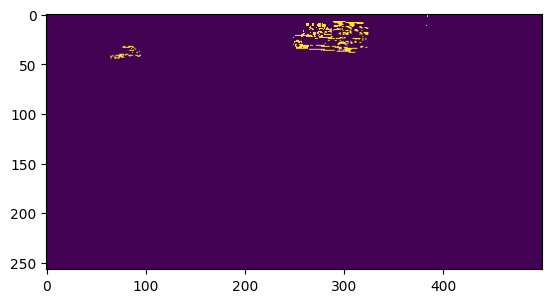

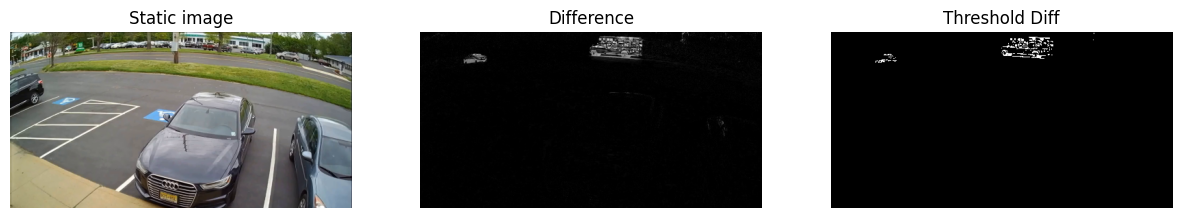

In [3]:
image_path_1 = 'data/images/static.png'
image_path_2 = 'data/images/test.png'
image1,gray_image1 = load_and_preprocess(image_path_1)
image2,gray_image2 = load_and_preprocess(image_path_2)

diff,thresh = subtract_images(gray_image1, gray_image2)
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title('Static image')
plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title('Difference')
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Threshold Diff')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

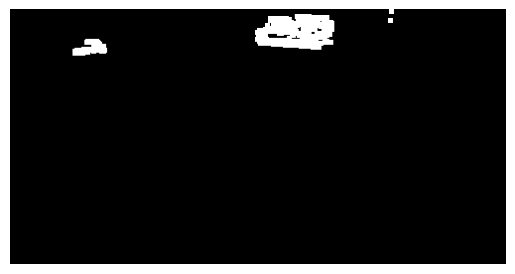

In [4]:
dilated_image = cv2.dilate(thresh, None, iterations=2)
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
contours = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
# contours

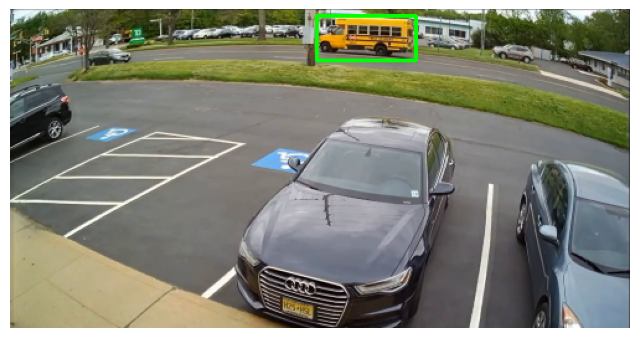

In [23]:
# draw rectangles (unchanged)
image2,gray_image2 = load_and_preprocess(image_path_2)
for c in contours:
    if cv2.contourArea(c) < 700:
        continue

    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# convert BGR → RGB for matplotlib
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [18]:
areas = [cv2.contourArea(c) for c in contours]
print(min(areas), max(areas))

16.0 2224.5
